<a href="https://colab.research.google.com/github/theresiasns/MachineLearning/blob/main/Fertilizer_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Fertilizer/Data/Fertilizer Prediction.csv')

# Split features and labels
X = df.drop('Fertilizer Name', axis=1)
y = df['Fertilizer Name']

print(X)
print(y)


    Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  \
0            26         52        38     Sandy      Maize        37   
1            29         52        45     Loamy  Sugarcane        12   
2            34         65        62     Black     Cotton         7   
3            32         62        34       Red    Tobacco        22   
4            28         54        46    Clayey      Paddy        35   
..          ...        ...       ...       ...        ...       ...   
94           25         50        32    Clayey     Pulses        24   
95           30         60        27       Red    Tobacco         4   
96           38         72        51     Loamy      Wheat        39   
97           36         60        43     Sandy    Millets        15   
98           29         58        57     Black  Sugarcane        12   

    Potassium  Phosphorous  
0           0            0  
1           0           36  
2           9           30  
3           0           20  
4 

In [ ]:
v = df['Crop Type'].unique()
print(v)

['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']


In [ ]:
print(y.unique())
np.save('/content/drive/MyDrive/Fertilizer/Fert_recommend_name.npy',y)

['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']


In [ ]:
# Encode the categorical labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
categorical_cols = ['Soil Type', 'Crop Type']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col].values)
print(X)
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
print(y_train)


    Temparature  Humidity   Moisture  Soil Type  Crop Type  Nitrogen  \
0            26         52        38          4          3        37   
1            29         52        45          2          8        12   
2            34         65        62          0          1         7   
3            32         62        34          3          9        22   
4            28         54        46          1          6        35   
..          ...        ...       ...        ...        ...       ...   
94           25         50        32          1          7        24   
95           30         60        27          3          9         4   
96           38         72        51          2         10        39   
97           36         60        43          4          4        15   
98           29         58        57          0          8        12   

    Potassium  Phosphorous  
0           0            0  
1           0           36  
2           9           30  
3           0      

In [ ]:

predicted_crop = label_encoders['Crop Type'].inverse_transform(X['Crop Type'].unique())


print(X['Crop Type'].unique(),predicted_crop)

[ 3  8  1  9  6  0 10  4  5  7  2] ['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']


In [ ]:
# Create a neural network model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)


Epoch 1/500
3/3 [==============================] - 1s 119ms/step - loss: 6.2451 - accuracy: 0.1392 - val_loss: 2.5337 - val_accuracy: 0.2000
Epoch 2/500
3/3 [==============================] - 0s 20ms/step - loss: 1.9009 - accuracy: 0.4684 - val_loss: 1.8747 - val_accuracy: 0.5000
Epoch 3/500
3/3 [==============================] - 0s 18ms/step - loss: 1.5959 - accuracy: 0.5063 - val_loss: 1.4152 - val_accuracy: 0.7000
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 1.3955 - accuracy: 0.6076 - val_loss: 0.8367 - val_accuracy: 0.8000
Epoch 5/500
3/3 [==============================] - 0s 17ms/step - loss: 0.7438 - accuracy: 0.8101 - val_loss: 0.6688 - val_accuracy: 0.8000
Epoch 6/500
3/3 [==============================] - 0s 17ms/step - loss: 0.7536 - accuracy: 0.7595 - val_loss: 0.6734 - val_accuracy: 0.8000
Epoch 7/500
3/3 [==============================] - 0s 17ms/step - loss: 0.7033 - accuracy: 0.7595 - val_loss: 0.4013 - val_accuracy: 0.9500
Epoch 8/500
3/3 [==

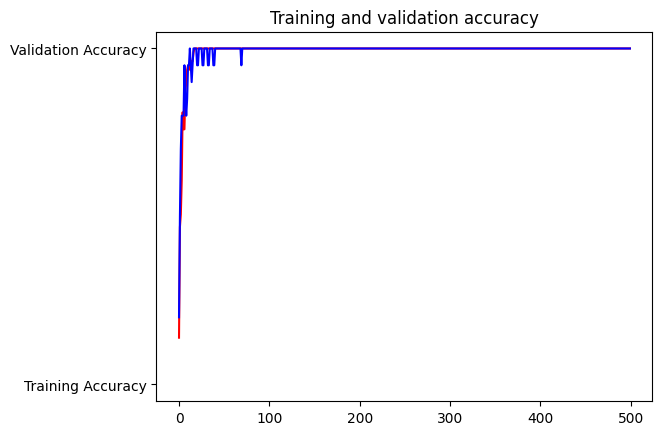

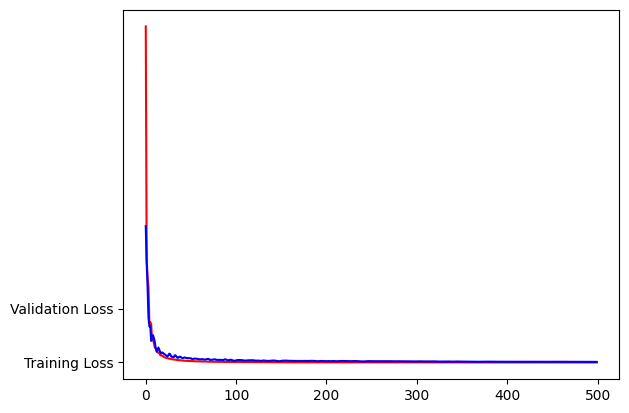

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
new_input = np.array([[22.0, 54.0, 28.0, 1.0, 7.0, 13.0, 0.0, 40.0]])
predicted_label = np.argmax(model.predict(new_input), axis=-1)
predicted_fertilizer = label_encoder.inverse_transform(predicted_label)
print("Predicted fertilizer:", predicted_fertilizer)

1/1 [==============================] - 0s 36ms/step
Predicted fertilizer: ['DAP']


In [ ]:
# Save model weights and architecture
model.save_weights('/content/drive/MyDrive/Fertilizer/Fert_predict_weights.h5')
model.save('/content/drive/MyDrive/Fertilizer/Fert_predict.h5')

In [ ]:
export = '/content/drive/MyDrive/Fertilizer'
tf.saved_model.save(model, export)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_model = converter.convert();


In [ ]:
s= scaler.inverse_transform(X)
sl = s.tolist()
xl = label_encoder.inverse_transform(X['Soil Type'])
print(sl[10])

IndexError: ignored

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/Fertilizer/Fert_predict.h5')

In [ ]:
new_input = np.array([[25.0, 54.0, 28.0, 1.0, 7.0, 13.0, 0.0, 40.0]])
predicted_label = np.argmax(loaded_model.predict(new_input), axis=-1)
predicted_crop = label_encoder.inverse_transform(predicted_label)
print("Predicted Crop:", predicted_crop)
print("Predicted Crop:", predicted_label)

1/1 [==============================] - 0s 70ms/step
Predicted Crop: ['DAP']
Predicted Crop: [5]
